<a href="https://colab.research.google.com/github/dipeshdimi/WineClassifier/blob/main/WineClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Project

# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import seaborn as sns

# Loading Dataset

In [42]:
# Find the dataset at: https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine
data = pd.read_csv('/content/WineDataset.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Filling Blank Columns

In [6]:
columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

for col in columns:
    data[col]= data[col].replace(r'^\s*$', np.NaN, regex=True)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)

# Wine Type : Integer Representation

In [7]:
data['type'].replace(to_replace=['white','red'], value=[0,1],inplace=True)
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Extracting Independent Variables

In [8]:
X = data.iloc[:,1:13]

# Extracting Dependent Variable

In [9]:
y = data.iloc[:,0]

# Correlation Matrix

<Axes: >

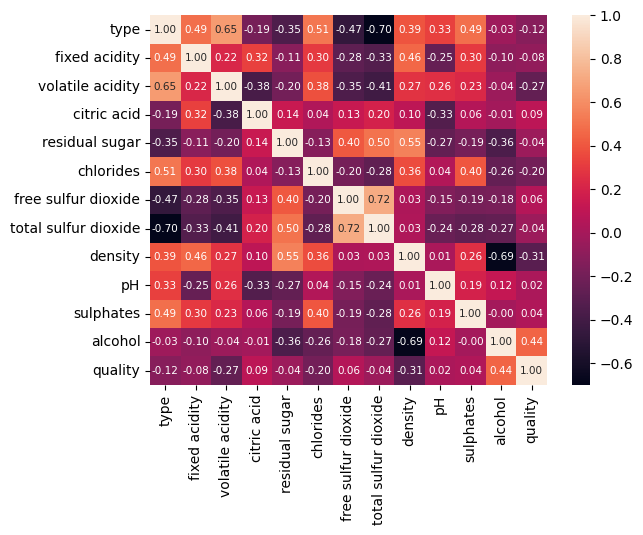

In [10]:
sns.heatmap(data.corr(), annot=True, fmt=".2f", annot_kws={'size': 7.5})

# Splitting Dataset into Training & Testing Set

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Feature Scaling

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_train.mean(), X_train.std())

# Loading KNN Model

In [34]:
k = round(sqrt(data.shape[0]))
classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')

# Fitting Model

In [35]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=81)

# Making Predictions

In [36]:
y_pred = classifier.predict(X_test)

# Model Evaluation

**ACCURACY**

In [37]:
cv_scores = cross_val_score(classifier, X, y, scoring="accuracy", cv=10)

print(cv_scores)
print('\ncv_scores mean:{}'.format(np.mean(cv_scores)))

[0.90461538 0.91230769 0.95230769 0.92923077 0.93538462 0.94
 0.96       0.9229584  0.93528505 0.94144838]

cv_scores mean:0.9333537987436291


**CONFUSION MATRIX**

In [38]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[972   3]
 [  9 316]]


**PRECISION**

In [39]:
print(precision_score(y_test,y_pred))

0.9905956112852664


**RECALL**

In [40]:
print(recall_score(y_test,y_pred))

0.9723076923076923


**F1 SCORE**

In [41]:
print(f1_score(y_test,y_pred))

0.9813664596273293
